<a href="https://colab.research.google.com/github/Nolram23/educacion-one-alura-oracle/blob/main/TelecomX_LATAM_solucion_marlon_miranda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [2]:
import pandas as pd

In [3]:
data = pd.read_json('TelecomX_Data.json')
data

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


#🔧 Transformación

In [4]:
customer_df = pd.json_normalize(data['customer'])
phone_df = pd.json_normalize(data['phone'])
internet_df = pd.json_normalize(data['internet'])
account_df = pd.json_normalize(data['account'])

In [8]:
data = pd.concat([data.drop(['customer', 'phone', 'internet', 'account'], axis=1),customer_df, phone_df, internet_df, account_df], axis=1)


KeyError: "['customer', 'phone', 'internet', 'account'] not found in axis"

In [9]:
data

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [10]:
data.head()


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


| Columna            | Descripción                                           |
| ------------------ | ----------------------------------------------------- |
| `customerID`       | ID único del cliente                                  |
| `Churn`            | Si el cliente se fue de la empresa (`Yes`/`No`)       |
| `gender`           | Género del cliente                                    |
| `SeniorCitizen`    | 1 si es mayor o igual a 65 años, 0 si no              |
| `Partner`          | Si tiene pareja                                       |
| `Dependents`       | Si tiene personas a su cargo                          |
| `tenure`           | Meses como cliente                                    |
| `PhoneService`     | Si tiene servicio telefónico                          |
| `MultipleLines`    | Si tiene múltiples líneas telefónicas                 |
| `InternetService`  | Tipo de servicio de internet (DSL, Fiber optic, None) |
| `OnlineSecurity`   | Tiene seguridad en línea                              |
| `OnlineBackup`     | Tiene respaldo en línea                               |
| `DeviceProtection` | Protección del dispositivo                            |
| `TechSupport`      | Soporte técnico                                       |
| `StreamingTV`      | Televisión por streaming                              |
| `StreamingMovies`  | Películas por streaming                               |
| `Contract`         | Tipo de contrato (Mensual, 1 año, 2 años)             |
| `PaperlessBilling` | Facturación electrónica                               |
| `PaymentMethod`    | Método de pago                                        |
| `Charges.Monthly`  | Cargo mensual                                         |
| `Charges.Total`    | Total pagado                                          |


Identificar columnas más relevantes para el análisis de evasión (Churn)
La variable objetivo es Churn, que indica si el cliente se fue.

Las variables relevantes para predecir o analizar evasión suelen ser:

🔹 Demográficas:
SeniorCitizen

Partner

Dependents

🔹 De servicios:
PhoneService, MultipleLines

InternetService

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport

StreamingTV, StreamingMovies

🔹 De contrato:
Contract ✅ (muy influyente)

PaperlessBilling

PaymentMethod

tenure ✅ (muy importante)

🔹 Financieras:
Charges.Monthly ✅

Charges.Total ✅

In [12]:
# Conteo de valores nulos por columna
data.isnull().sum()

,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [13]:
# Verificar duplicados
data.duplicated().sum()

np.int64(0)

In [14]:
data[data.duplicated()]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [15]:
# Revisar si columnas numéricas tienen strings erróneos
data['Charges.Monthly'].value_counts(dropna=False)


,count
Charges.Monthly,
20.05,65
19.90,46
19.85,46
19.55,45
19.70,45
...,...
87.90,1
87.60,1
52.20,1


In [16]:
# Revisar valores únicos en columnas categóricas
for col in data.select_dtypes(include='object'):
    print(f"{col}: {data[col].unique()}")

customerID: ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn: ['No' 'Yes' '']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['Yes' 'No']
PhoneService: ['Yes' 'No']
MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']


In [20]:
data.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [18]:
data['Charges.Total'].value_counts(dropna=False).head(20)

,count
Charges.Total,
20.2,11
,11
19.75,9
19.55,9
19.9,9
20.05,8
19.65,8
45.3,7
20.25,7


In [19]:
data['Charges.Total'] = pd.to_numeric(data['Charges.Total'], errors='coerce')


In [21]:
# Detectar columnas categóricas (tipo object)
cat_cols = data.select_dtypes(include='object').columns

# Normalizar: eliminar espacios y poner todo en minúsculas
for col in cat_cols:
    data[col] = data[col].str.strip().str.lower()

In [23]:
data.dtypes


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [26]:
data.apply(lambda x: x.astype(str).str.strip() == '').sum()


,0
customerID,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


In [25]:
# Eliminar filas donde 'Churn' esté vacío
data = data[~data['Churn'].isna() & (data['Churn'] != '')]


In [27]:
data.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Insights rápidos:
🔸 SeniorCitizen
Solo el 16% de los clientes son adultos mayores (mean = 0.16)

La mayoría no lo son (mediana = 0)

🔸 tenure
Clientes tienen entre 0 y 72 meses de antigüedad (6 años)

Mediana = 29 meses, lo que indica que la mitad de los clientes lleva más de 2 años

🔸 Charges.Monthly
Promedio: ~$64.76

Valores entre $18.25 y $118.75

Alta dispersión (std = 30)

🔸 Charges.Total
Hay 11 valores faltantes (count = 7032 en lugar de 7043)

Promedio: ~$2283

Algunos clientes acumulan hasta $8684

In [28]:
data = data.dropna(subset=['Charges.Total'])

In [30]:
data.describe()

,SeniorCitizen,tenure,Charges.Monthly,Charges.Total
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [31]:
data[data['tenure'] == 0]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [32]:
data['Cuentas_Diarias'] = data['Charges.Monthly'] / 30
print(data[['Charges.Monthly', 'Cuentas_Diarias']].head())


   Charges.Monthly  Cuentas_Diarias
0             65.6         2.186667
1             59.9         1.996667
2             73.9         2.463333
3             98.0         3.266667
4             83.9         2.796667


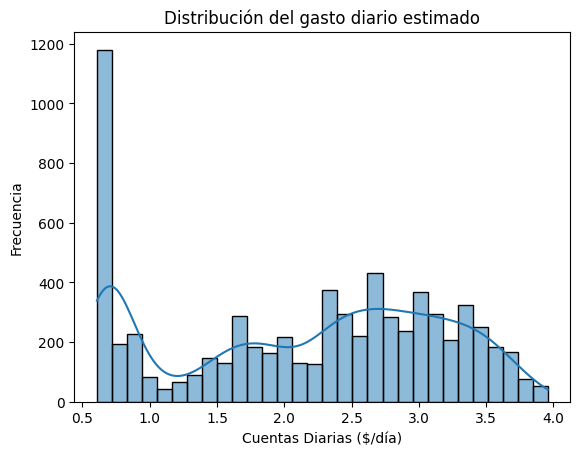

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data['Cuentas_Diarias'], bins=30, kde=True)
plt.title("Distribución del gasto diario estimado")
plt.xlabel("Cuentas Diarias ($/día)")
plt.ylabel("Frecuencia")
plt.show()

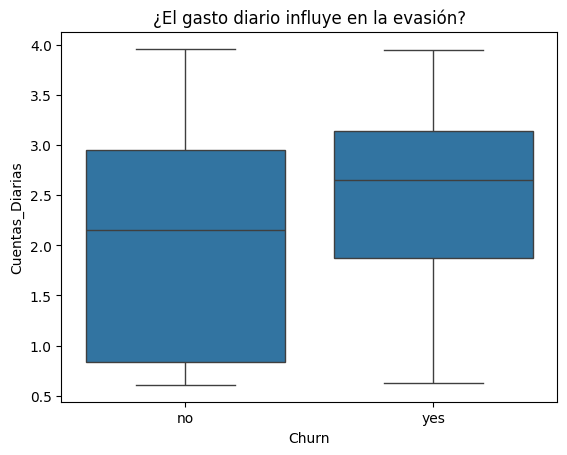

In [34]:
sns.boxplot(x='Churn', y='Cuentas_Diarias', data=data)
plt.title("¿El gasto diario influye en la evasión?")
plt.show()

In [35]:
import plotly.express as px

px.histogram(data, x='gender', text_auto=True, color='Churn', barmode='group')

In [36]:
data['SeniorCitizen_str'] = data['SeniorCitizen'].map({0: 'No', 1: 'Sí'})

px.histogram(data, x='SeniorCitizen_str', text_auto=True, color='Churn', barmode='group',
             labels={'SeniorCitizen_str': '¿Es adulto mayor?'})


#📊 Carga y análisis

<Axes: >

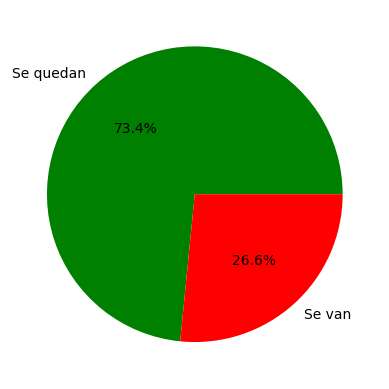

In [37]:
data['Churn'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Se quedan', 'Se van'], colors=['green', 'red'], ylabel='')


In [38]:
px.histogram(data, x='Contract', color='Churn', barmode='group', text_auto=True)


<Axes: xlabel='tenure', ylabel='Count'>

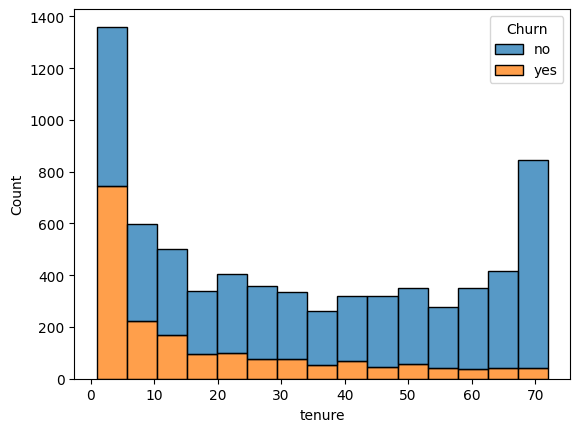

In [39]:
import seaborn as sns
sns.histplot(data=data, x='tenure', hue='Churn', multiple='stack')


In [40]:
data['tenure_group'] = pd.cut(data['tenure'], bins=[0, 12, 24, 48, 72], labels=['0-12', '13-24', '25-48', '49-72'])
px.histogram(data, x='tenure_group', color='Churn', barmode='group', text_auto=True)


In [41]:
px.histogram(data, x='PaymentMethod', color='Churn', barmode='group', text_auto=True)


<Axes: xlabel='Churn', ylabel='Charges.Monthly'>

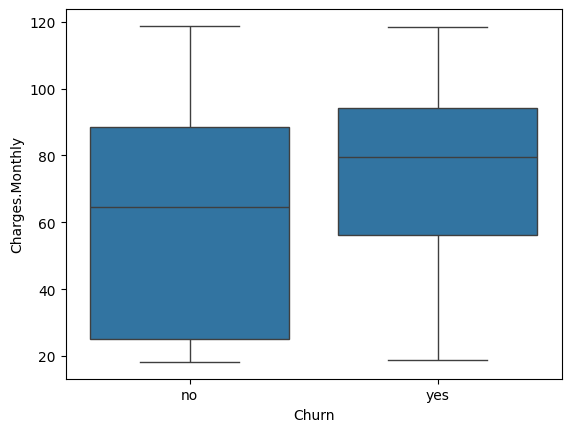

In [42]:
sns.boxplot(x='Churn', y='Charges.Monthly', data=data)


Variables numéricas a analizar
Las más importantes son:

Variable	Significado
tenure	Meses como cliente
Charges.Monthly	Monto mensual
Charges.Total	Total pagado por el cliente
Cuentas_Diarias	Estimación diaria (opcional)

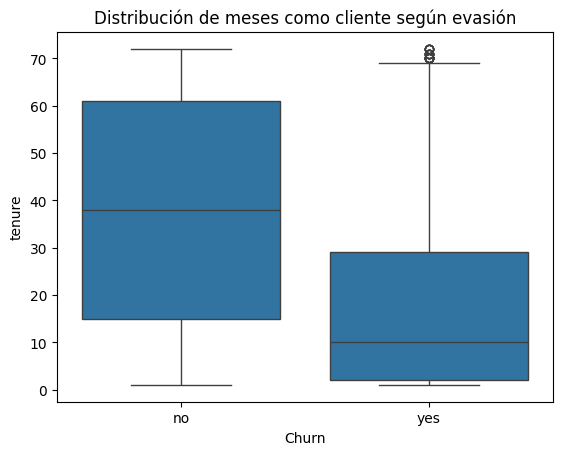

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Distribución de meses como cliente según evasión')
plt.show()


<Axes: xlabel='Churn', ylabel='tenure'>

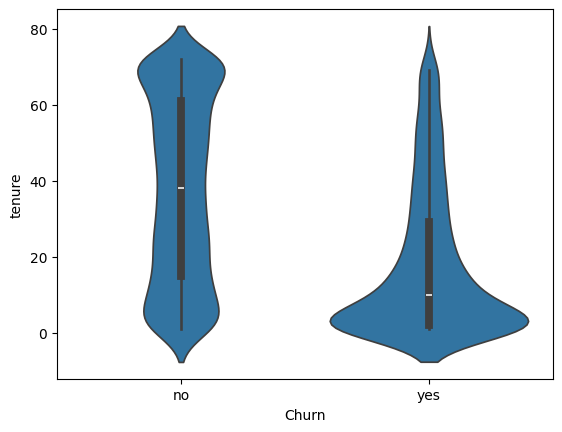

In [44]:
sns.violinplot(x='Churn', y='tenure', data=data)


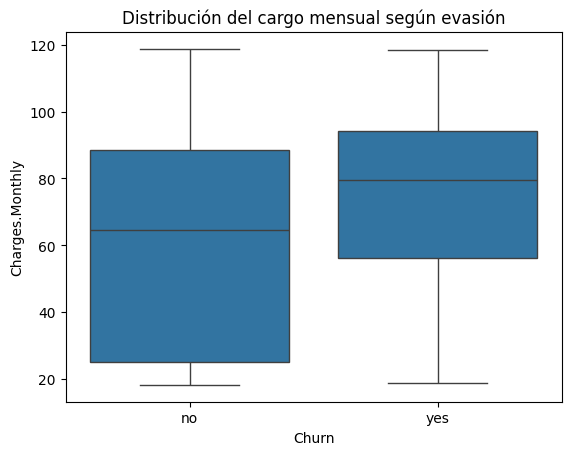

In [45]:
sns.boxplot(x='Churn', y='Charges.Monthly', data=data)
plt.title('Distribución del cargo mensual según evasión')
plt.show()


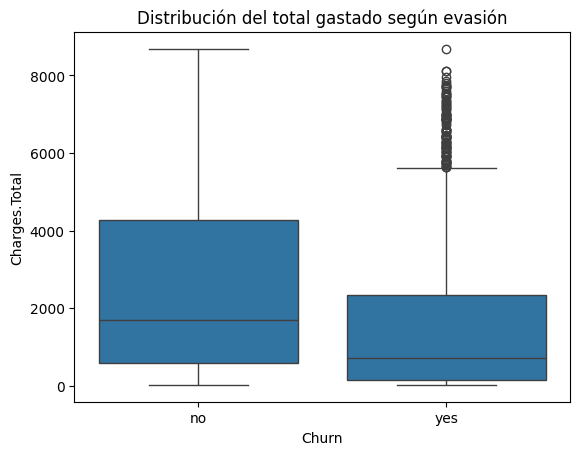

In [46]:
sns.boxplot(x='Churn', y='Charges.Total', data=data)
plt.title('Distribución del total gastado según evasión')
plt.show()


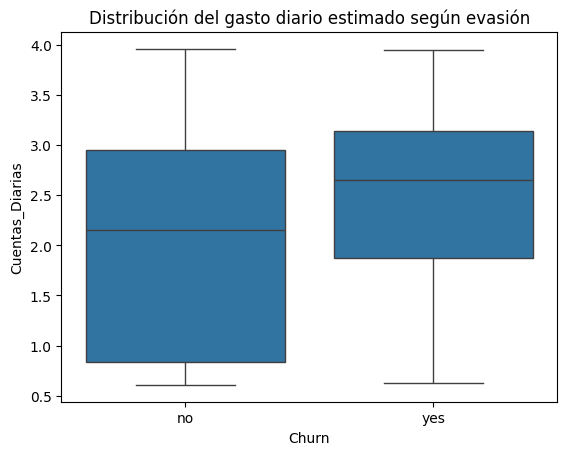

In [47]:
sns.boxplot(x='Churn', y='Cuentas_Diarias', data=data)
plt.title('Distribución del gasto diario estimado según evasión')
plt.show()


#📄Informe final

📊 Informe Final – Análisis de Evasión de Clientes (Churn) – TelecomX
🔹 1. Introducción
El presente análisis busca entender los factores asociados a la evasión de clientes (Churn) en una empresa de telecomunicaciones. Utilizando datos reales, analizamos variables demográficas, de servicio y de facturación para identificar patrones que expliquen por qué algunos clientes abandonan la compañía y otros permanecen.

🔹 2. Limpieza y Tratamiento de Datos
Se cargó el archivo TelecomX_Data.json usando pandas.read_json.

Se detectaron columnas anidadas (customer, phone, internet, account) que fueron expandidas con pd.json_normalize para aplanar el DataFrame.

Se identificaron y eliminaron valores vacíos en la variable objetivo Churn.

Se convirtieron columnas mal tipadas (Charges.Total) a float.

Se normalizaron todas las columnas categóricas (eliminación de espacios, todo en minúsculas).

Se crearon nuevas variables como:

Cuentas_Diarias = Charges.Monthly / 30

tenure_group (agrupación de antigüedad)

SeniorCitizen_str (versión legible)

🔹 3. Análisis Exploratorio de Datos (EDA)
🔸 Distribución general de evasión

Solo el 26% de los clientes abandonaron la compañía, el resto permaneció.

🔸 Churn por características demográficas y de servicio
Adultos mayores (SeniorCitizen) tienen una leve mayor tasa de evasión.

Contrato mensual se asocia fuertemente con la evasión.

Servicios como Internet Fiber Optic tienen mayor churn que DSL o sin internet.

Clientes con menor tenure (menos de 12 meses) presentan las tasas más altas de cancelación.

🔸 Variables numéricas
Clientes que se fueron tienen significativamente menor antigüedad (tenure).

El total pagado (Charges.Total) es más bajo en clientes que se fueron → la mayoría eran nuevos.

El cargo mensual (Charges.Monthly) muestra mayor churn en rangos intermedios-altos.

🔹 4. Conclusiones e Insights
La antigüedad del cliente es el factor más asociado al churn: clientes nuevos tienden a cancelar más.

El tipo de contrato influye directamente: los contratos mensuales muestran mucha mayor evasión que los anuales.

El método de pago y el tipo de servicio (como Fiber optic) también están correlacionados con mayor cancelación.

Clientes con cargos mensuales moderadamente altos pero sin beneficios adicionales (como soporte técnico o respaldo) también presentan mayor churn.

🔹 5. Recomendaciones Estratégicas
🎯 Segmentar clientes nuevos (menos de 12 meses) y aplicar campañas de retención específicas (descuentos, beneficios, soporte).

📞 Fomentar contratos a largo plazo mediante ofertas o beneficios exclusivos.

💳 Analizar métodos de pago con mayor churn y promover métodos más estables (como débito automático).

🛠 Reforzar servicios complementarios (soporte técnico, seguridad en línea) para clientes de Fiber optic.

📈 Implementar un modelo de Machine Learning predictivo para anticipar clientes con riesgo de evasión y tomar acciones proactivas.

In [48]:
# Convertir Churn a 1 (sí) y 0 (no)
data['Churn_num'] = data['Churn'].map({'yes': 1, 'no': 0})


In [49]:
# Calcular correlación con variables numéricas
correlation_matrix = data[['Churn_num', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']].corr()
print(correlation_matrix)


                 Churn_num    tenure  Charges.Monthly  Charges.Total  \
Churn_num         1.000000 -0.354049         0.192858      -0.199484   
tenure           -0.354049  1.000000         0.246862       0.825880   
Charges.Monthly   0.192858  0.246862         1.000000       0.651065   
Charges.Total    -0.199484  0.825880         0.651065       1.000000   
Cuentas_Diarias   0.192858  0.246862         1.000000       0.651065   

                 Cuentas_Diarias  
Churn_num               0.192858  
tenure                  0.246862  
Charges.Monthly         1.000000  
Charges.Total           0.651065  
Cuentas_Diarias         1.000000  


🔍 ¿Cómo interpretarlo?
Correlación cercana a -1: relación inversa fuerte (más valor, menos churn)

Correlación cercana a 1: relación directa fuerte (más valor, más churn)

Correlación cercana a 0: no hay relación lineal

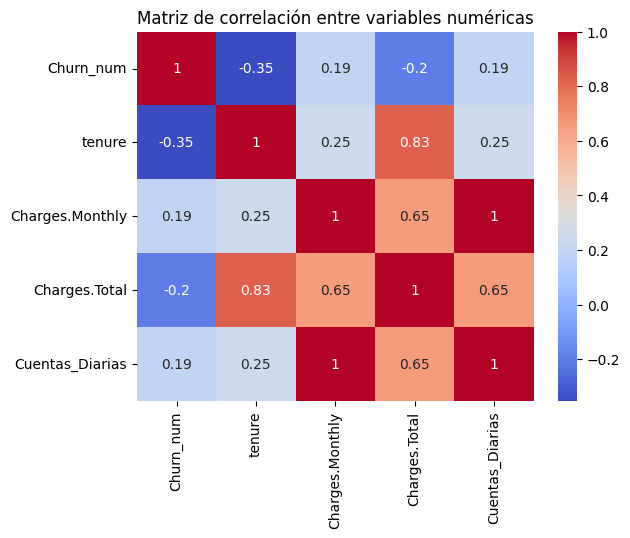

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

In [51]:
servicios = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Convertir a 1 (sí) y 0 (no)
for col in servicios:
    data[col + '_bin'] = data[col].map({'yes': 1, 'no': 0, 'no internet service': 0, 'no phone service': 0})

# Sumar servicios contratados
data['Servicios_Contratados'] = data[[col + '_bin' for col in servicios]].sum(axis=1)


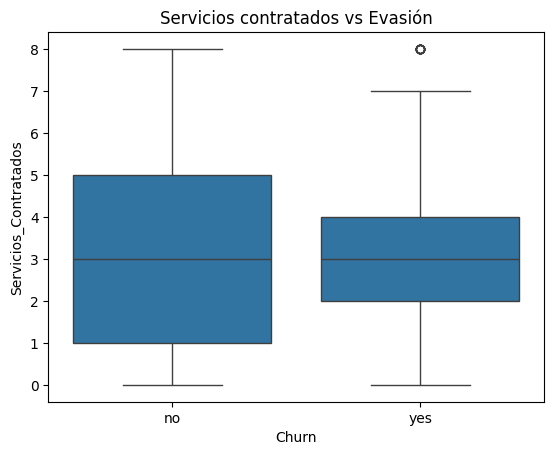

In [52]:
sns.boxplot(x='Churn', y='Servicios_Contratados', data=data)
plt.title("Servicios contratados vs Evasión")
plt.show()

 Análisis e interpretación
1. Clientes que se quedan (no):
Mediana ≈ 3 servicios

Hay clientes con hasta 8 servicios contratados

Distribución más amplia → hay muchos con pocos y muchos servicios

2. Clientes que se van (yes):
También tienen mediana ≈ 3, pero:

Distribución más concentrada en los valores bajos

Menos clientes con más de 5 servicios

Hay un par de outliers con 7–8 servicios, pero son excepcionales

✅ Conclusiones clave:
Los clientes con menos servicios contratados tienden a irse más.

Los clientes que tienen más servicios contratados son más propensos a quedarse, probablemente por estar más "atados" a la empresa.

La variedad de servicios funciona como un mecanismo de retención.

🎯 Sugerencia estratégica:
Incentivar a los nuevos clientes a contratar más de un servicio desde el inicio puede ayudar a reducir la tasa de evasión.








